# Data Analyst

There are four data sets provided with these questions. For the most part, the column names in each file are
self-explanatory, but for “InterviewData_Activity.csv”, here is a quick description of the variables:

- userid (our unique identifier of a member in the database)
- date the member last placed an order
- age (an integer value)
- gender (“M” or “F”)
- metropolitan_area (sample metro areas)
- device_type used (Desktop, Tablet, or Mobile)
- active (the response variable and a binary outcome, “0” meaning they were not an active member and “1” meaning they were active at the time this illustrative data was generated)

#### My response and this jupyter notebook covers the following Questions:

(1) Using any functions/packages you want, join these two data sets by “date” and “source_id”, returning
all rows from both regardless of whether there is a match between the two data sets.

(2) Using any functions/packages you want, join these two data sets by “date” and “source_id”, returning
only the rows from the “Cost” file that have no corresponding date in the “Revenue” file.

(3) Using your result from #1, what are the Top 4 sources (“source_id” values) in terms of total revenue
generation across this data set? How would you visualize the monthly revenue for those Top 4 sources?
(note: you don’t need to actually create a plot; you can just describe what your ideal visual would look
like)

(4) Assuming you’ve read the data into a Pandas DataFrame called df, run the following code to build a
basic logistic regression model:

Apply this model to the same data that the model was trained on and assess the prediction accuracy
(5) Split the data into training and test samples, and build a model over the training data using the following
Python code:
Assess the training data model’s accuracy on the test data. Why does the accuracy change so much?

(6) This data comes from a subset of userdata JSON blobs stored in our database. Parse out the values
(stored in the “data_to_parse” column) into four separate columns. So for example, the four additional
columns for the first entry would have values of “N”, “U”, “A7”, and “W”. You can use any
functions/packages you want for this.

ADDITIONAL QUESTION 
B) One of the ways we attract new members is through digital marketing campaigns (e.g., on Facebook).
Assume that we know a little bit about potential users who see an ad for Shipt on Facebook – things like
name and general metropolitan area, and then can measure the impressions on the ad, clicks to our
landing page, and then conversions on our landing page. Our goal then is to drive more conversions on
the landing page. What are some ways you might look at the already collected data (or some ways to
enrich the existing data set) to try and make recommendations to the Marketing team for how to

#### Data Loading

In [20]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [6]:
Rev = pd.read_csv("data/InterviewData_Rev.csv") 
Parsing = pd.read_csv("data/InterviewData_Parsing.csv") 
Cost = pd.read_csv("data/InterviewData_Cost.csv") 
Activity = pd.read_csv("data/InterviewData_Activity.csv") 

In [7]:
Rev.head()

,date,source_id,revenue
0,8/1/14,PA0368,5717.0
1,1/31/14,PA0277,1380.0
2,6/9/14,PA0745,7535.0
3,9/1/14,PA0751,2868.0
4,3/12/14,PA0859,10757.0


In [8]:
Parsing.head()

,userid,data_to_parse
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]"
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]"
2,54f650f004474,"""value"":""Y;U;A7;W""}]"
3,54f52e8872227,"""value"":""N;U;I1;W""}]"
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]"


In [9]:
Cost.head()

,date,source_id,cost
0,10/17/14,PA0577,7168.0
1,8/17/14,PA0354,7615.0
2,1/7/14,PA0607,4054.0
3,8/25/14,PA0745,9317.0
4,11/30/14,PA0923,5586.0


In [10]:
Activity.head()

,userid,date,age,gender,metropolitan_area,device_type,active
0,4e3a9ea937b3a,8/4/15,30,F,Detroit,Tablet,1
1,4e3dd5154a08c,8/6/15,43,F,Charlotte,Desktop,1
2,4e3df1ecd131a,8/6/15,41,F,Tampa,Mobile,1
3,4e4e77461b1e3,8/19/15,56,F,Nashville,Desktop,1
4,4e4eb59b6de55,8/19/15,33,F,Detroit,Mobile,1


In [25]:
len(Activity.index)

5420

## Question 1

Using any functions/packages you want, join these two data sets by “date” and “source_id”, returning
all rows from both regardless of whether there is a match between the two data sets.

In [15]:
costplusrev  = pd.merge(left=Cost, right=Rev, on=['date','source_id'], how='inner')
print(costplusrev)

          date source_id    cost  revenue
0     10/17/14    PA0577  7168.0   8417.0
1      8/17/14    PA0354  7615.0   4200.0
2       1/7/14    PA0607  4054.0   7935.0
3      8/25/14    PA0745  9317.0   5536.0
4     12/22/14    PA0808  8049.0   3573.0
...        ...       ...     ...      ...
5377  12/24/14    PA0745  7063.0   9389.0
5378  12/16/14    PA0973   733.0   5314.0
5379    6/8/14    PA0752  3574.0      NaN
5380  10/14/14    PA0277  9112.0   8853.0
5381   1/29/14    PA0470  4186.0   2146.0

[5382 rows x 4 columns]


## Question 2

Using any functions/packages you want, join these two data sets by “date” and “source_id”, returning
only the rows from the “Cost” file that have no corresponding date in the “Revenue” file.

In [17]:
costplusrev  = pd.merge(left=Cost, right=Rev, on=['date','source_id'], how='left')
print(costplusrev)

          date source_id    cost  revenue
0     10/17/14    PA0577  7168.0   8417.0
1      8/17/14    PA0354  7615.0   4200.0
2       1/7/14    PA0607  4054.0   7935.0
3      8/25/14    PA0745  9317.0   5536.0
4     11/30/14    PA0923  5586.0      NaN
...        ...       ...     ...      ...
9995   1/10/14    PA0830  6202.0      NaN
9996   1/31/14    PA0467  7057.0      NaN
9997  10/14/14    PA0277  9112.0   8853.0
9998   10/1/14    PA0293  1053.0      NaN
9999   1/29/14    PA0470  4186.0   2146.0

[10000 rows x 4 columns]


## Question 3

Using your result from 1, what are the Top 4 sources (“source_id” values) in terms of total revenue
generation across this data set?

In [19]:
highestrevenue = costplusrev.sort_values('revenue', ascending=False)

In [20]:
print(highestrevenue)

          date source_id    cost  revenue
3322   1/11/14    PA0202  9637.0  12000.0
3176   1/17/14    PA0057  1691.0  11999.0
4748  10/14/14    PA0873  8376.0  11995.0
752    5/30/14    PA0678  9739.0  11992.0
6377    8/8/14    PA0745  7905.0  11988.0
...        ...       ...     ...      ...
9993   12/7/14    PA0900  2037.0      NaN
9994   7/11/14    PA0474   726.0      NaN
9995   1/10/14    PA0830  6202.0      NaN
9996   1/31/14    PA0467  7057.0      NaN
9998   10/1/14    PA0293  1053.0      NaN

[10000 rows x 4 columns]


## Top 4 Resources

In [21]:
highestrevenue.head(4)

,date,source_id,cost,revenue
3322,1/11/14,PA0202,9637.0,12000.0
3176,1/17/14,PA0057,1691.0,11999.0
4748,10/14/14,PA0873,8376.0,11995.0
752,5/30/14,PA0678,9739.0,11992.0


In [37]:
df_plot= highestrevenue.loc[highestrevenue['source_id'].isin(['PA0202','PA0057','PA0873','PA0678'])]
print(df_plot)


           date source_id    cost  revenue
3322 2014-01-11    PA0202  9637.0  12000.0
3176 2014-01-17    PA0057  1691.0  11999.0
4748 2014-10-14    PA0873  8376.0  11995.0
752  2014-05-30    PA0678  9739.0  11992.0
5442 2014-02-13    PA0202  4157.0  11954.0
...         ...       ...     ...      ...
9800 2014-02-09    PA0873   989.0      NaN
9855 2014-06-20    PA0873  6407.0      NaN
9857 2014-03-01    PA0202  7104.0      NaN
9897 2014-07-14    PA0057  7231.0      NaN
9946 2014-01-08    PA0057  2308.0      NaN

[789 rows x 4 columns]


## Question 3 : For Viz

How would you visualize the monthly revenue for those Top 4 sources?
(note: you don’t need to actually create a plot; you can just describe what your ideal visual would look
like)

#### NOTE that the vizualization was done in a different jupyter notebook so I am attaching the screenshot of the vizualization seperately in case it is not viewable here.

In [42]:
df_plot.groupby(df_plot['date'].dt.strftime('%B'))['revenue'].sum().sort_values()

date
February     123702.0
April        136110.0
July         145350.0
March        178350.0
October      199992.0
September    203631.0
December     204183.0
January      209337.0
August       231515.0
November     233001.0
May          267656.0
June         277374.0
Name: revenue, dtype: float64

In [44]:
(df_plot.groupby([df_plot['date'].dt.strftime('%B'), 'source_id'])['revenue']
        .sum()
        .sort_index())

date       source_id
April      PA0057       16001.0
           PA0202       54063.0
           PA0678       24219.0
           PA0873       41827.0
August     PA0057       40673.0
           PA0202       75281.0
           PA0678       60318.0
           PA0873       55243.0
December   PA0057       49781.0
           PA0202       71797.0
           PA0678       24975.0
           PA0873       57630.0
February   PA0057       13193.0
           PA0202       44211.0
           PA0678       29862.0
           PA0873       36436.0
January    PA0057       65707.0
           PA0202       67384.0
           PA0678       29392.0
           PA0873       46854.0
July       PA0057       31533.0
           PA0202       49663.0
           PA0678       10520.0
           PA0873       53634.0
June       PA0057       97229.0
           PA0202       56115.0
           PA0678       72770.0
           PA0873       51260.0
March      PA0057       44622.0
           PA0202       54079.0
           PA0678  

In [ ]:
dfg = df_plot.groupby(['month', 'source_id']).agg({'revenue': sum}).reset_index()


dfg.month = pd.Categorical(df_plot.month, categories=list(calendar.month_name)[1:], ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='revenue', data=dfg, hue='source_id')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

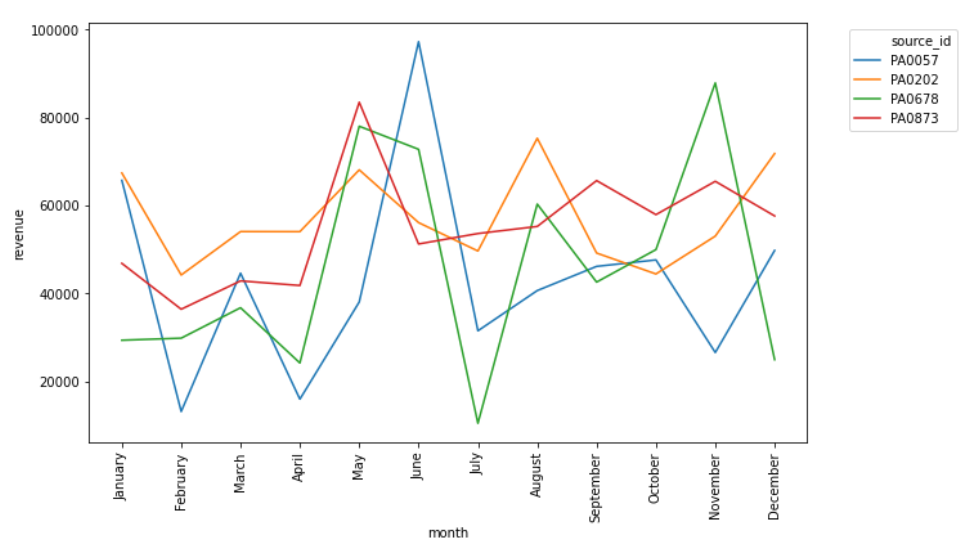

## Question 4 

Assuming you’ve read the data into a Pandas DataFrame called df, run the following code to build a
basic logistic regression model:
Apply this model to the same data that the model was trained on and assess the prediction accuracy.

In [11]:
dummy_genders = pd.get_dummies(Activity['gender'], prefix = 'gender')

In [12]:
dummy_metro = pd.get_dummies(Activity['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(Activity['device_type'], prefix = 'device')
cols_to_keep = ['active', 'age']

In [13]:
activity_data= Activity[cols_to_keep].join(dummy_genders.loc[:, 'gender_M':])
activity_data= activity_data.join(dummy_metro.loc[:, 'metro_area_Birmingham':])

In [14]:
activity_data = activity_data.join(dummy_device.loc[:, 'device_Mobile':])
activity_data = sm.add_constant(activity_data, prepend=False)
explanatory_cols = activity_data.columns[1:]
full_logit_model = sm.GLM(activity_data['active'],activity_data[explanatory_cols],family=sm.families.Binomial())
result = full_logit_model.fit()


In [15]:
print(result)

In [16]:
result.predict(activity_data[explanatory_cols])

0       0.561944
1       0.469301
2       0.586239
3       1.000000
4       0.505904
          ...   
5415    0.298635
5416    0.542475
5417    0.437380
5418    0.437380
5419    0.549623
Length: 5420, dtype: float64

##  Question 5

Split the data into training and test samples, and build a model over the training data using the following
Python code:
Assess the training data model’s accuracy on the test data. 

In [17]:
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
training_logit_model = sm.GLM(training_data['active'],
training_data[explanatory_cols],
family=sm.families.Binomial())
training_result = training_logit_model.fit()


In [18]:
training_result.predict(training_data[explanatory_cols])

1       0.632930
2       0.715332
3       1.000000
4       0.631061
5       0.620918
          ...   
3995    0.520810
3996    0.655526
3997    0.520810
3998    0.154417
3999    0.653253
Length: 3999, dtype: float64

In [19]:
training_result.predict(test_data[explanatory_cols])

4001    0.726291
4002    0.720639
4003    0.594376
4004    0.615066
4005    0.630841
          ...   
5415    0.455891
5416    0.650352
5417    0.559387
5418    0.559387
5419    0.699250
Length: 1419, dtype: float64

Why does the accuracy change so much?

It's usually recommend to build the model that gets evaluated using methods like k-fold cross-validation. Its accuracy is good

##     Question 6

### Question 6 deals with “InterviewData_Parsing.csv”.
(6) This data comes from a subset of userdata JSON blobs stored in our database. Parse out the values
(stored in the “data_to_parse” column) into four separate columns. So for example, the four additional
columns for the first entry would have values of “N”, “U”, “A7”, and “W”. You can use any
functions/packages you want for this.

In [23]:
s = ("{" + Parsing["data_to_parse"].str.strip("]")).apply(pd.io.json.loads)
df2 = s.apply(pd.Series)["value"].str.split(";", expand=True)
new_df = pd.concat([Parsing, df2.add_prefix("value")], axis=1)
print(new_df)

            userid         data_to_parse value0 value1 value2 value3
0    54f3ad9a29ada  "value":"N;U;A7;W"}]      N      U     A7      W
1    54f69f2de6aec  "value":"N;U;I6;W"}]      N      U     I6      W
2    54f650f004474  "value":"Y;U;A7;W"}]      Y      U     A7      W
3    54f52e8872227  "value":"N;U;I1;W"}]      N      U     I1      W
4    54f64d3075b72  "value":"Y;U;A7;W"}]      Y      U     A7      W
..             ...                   ...    ...    ...    ...    ...
948  54f5eb32d1a5b  "value":"N;U;A1;W"}]      N      U     A1      W
949  54f34bd1a812a  "value":"N;C;A2;L"}]      N      C     A2      L
950  54f34aa1e1f00  "value":"Y;U;A1;W"}]      Y      U     A1      W
951  54f47d97846bc  "value":"N;U;I4;L"}]      N      U     I4      L
952  54f5337f14bd6  "value":"N;U;A4;W"}]      N      U     A4      W

[953 rows x 6 columns]


## Additional Questions – Pick One

B) One of the ways we attract new members is through digital marketing campaigns (e.g., on Facebook).
Assume that we know a little bit about potential users who see an ad for Shipt on Facebook – things like
name and general metropolitan area, and then can measure the impressions on the ad, clicks to our
landing page, and then conversions on our landing page. Our goal then is to drive more conversions on
the landing page. What are some ways you might look at the already collected data (or some ways to
enrich the existing data set) to try and make recommendations to the Marketing team for how to optimize their campaigns?

1)	Gathering information through surveys: Customers that know Shipt are more likely to provide more information that they feel will help us personalize and customize their customer experience in the future. The surveys can be introduced at the end of shopping online or on social media channels like facebook, Instagram etc. It is a great way to capture communication preferences and preferred frequency.

2)	Using Web Analytics: Online Behavior offers a plethora of information about a customer’s intent and interests. Cookies allows to link behavior to customer records for a detailed view of products that the customer might be interested in and purchase timelines. For eg: A person is looking at pet products online, with the help of cookies we can capture this information and send this customer an email containing products from Petsmart on Shipt. In the same way lots of data can be used in conversational marketing campaigns that offer highly relevant recommendations based on cookie history.

3)	Monitor Customer’s Email Behavior: On an average a customer receives 9000 emails a year. And not all emails are opened by the customer, so we need to recognize the odds that information is sent wisely. By monitoring how a customer clicks, when they click and how often they engage in email interaction. If we have this data, it can reveal some key insights on how we optimize the frequency of digital communication and messaging.

4)	Form Capture & Progressive Profiling: Form capture on landing pages that offer value such as a discount on some items or delivery fee waived on first order in exchange for customer information are a natural source of customizable data capture. Progressive profiling allows to ask a few questions at a time over a period of months or years thereby slowly augmenting the customer record over time. As long as our target audience sees value in exchange for sharing personal information, progressive profiling can become a rich source of insight to enrich the customer database.

Now from a more technical point of view on how we can get enriched data:These days most of the companies use cloud data warehouses. The data when we first come across it is in a very raw format. So there are a number of steps involved in making this unstructured data structured and enriched which is easier to do further analysis--

1)	Extract: This is the raw data from the source which is usually unstructured, In AWS or any cloud Technologies we use we make 3 buckets namely- Raw/Transformed/ Enriched. Initially using file transfer we transfer all our data to the Raw bucket first which creates a central repo.

2)	Transform: We perform transformations on data such is removing pipe delimiters, correcting data type, validating data, profiling, etc 

3)	  Load: After the transformations are done we load the structured data into Redshift which is a data warehouse , OLAP which is used for Analytics, from this stage slicing and dicing of the data can be done to produce insights.

4)	There is one more component which is the Enriched bucket, the data going into this bucket is in a very filtered format, for example- older data that doesn’t hold any value is discarded, upto date records which are daily records that come through change data capture are stored in this bucked.

Thus with the above process we make sure that the data we have is true to its form, upto date and structured.
